# **Lab Sheet6: Content Analysis**

Objective:
To understand and apply content analysis techniques such as text preprocessing, word frequency analysis, keyword extraction (TF-IDF), and sentiment analysis on a given text dataset using Python.

Instructions:

Task 1: Setup and Data Loading

Task 2: Text Preprocessing

* Clean the Text:Remove punctuation, convert text to lowercase, remove stop words, and tokenize the text.
* Tokenization (Optional):

If desired, further break down the cleaned text into individual tokens.

Task 3: Word Frequency Analysis
* Compute Word Frequency:
Count the frequency of each word in the cleaned text

Task 4: Keyword Extraction (TF-IDF)
* Compute TF-IDF: Use TfidfVectorizer from sklearn to extract important keywords.

Task 4: Sentiment Analysis
* Perform sentiment analysis: Use nltk's VADER tool for sentiment analysis.

* Categorize sentiment: Label text as positive, neutral, or negative based on sentiment score.

* Analyze Sentiment Distribution:
Plot a pie chart to show the distribution of positive, negative, and neutral reviews.

# The Dataset we used for this is scraped from Reddit Post
 (Link-"https://www.reddit.com/r/TrueUnpopularOpinion/comments/mx67mq/there_are_only_2_genders/")

 ## Content analysis on "There are only 2 genders."
 dataset count (comments) = 13798

 Shubhankar Sharma
 102118021

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/dataset.xlsx')  # Replace with the actual uploaded filename
print(df.head())  # View the first few rows of the dataset


                                                body              category  \
0  It's sad that this is now an unpopular opinion...                   NaN   
1                                          [deleted]  TrueUnpopularOpinion   
2  Or you're some mix of the two, but its very ve...  TrueUnpopularOpinion   
3                         Literal Newspeak in action  TrueUnpopularOpinion   
4                    one genders actually\n\n_monke_  TrueUnpopularOpinion   

            communityName                 createdAt dataType  flair  \
0  r/TrueUnpopularOpinion  2021-04-23T22:01:51.000Z     post    NaN   
1  r/TrueUnpopularOpinion  2021-04-23T23:13:14.000Z  comment    NaN   
2  r/TrueUnpopularOpinion  2021-04-23T23:58:53.000Z  comment    NaN   
3  r/TrueUnpopularOpinion  2021-04-24T00:53:20.000Z  comment    NaN   
4  r/TrueUnpopularOpinion  2021-04-24T02:03:16.000Z  comment    NaN   

                                                html          id   isAd  \
0  &lt;!-- SC_OFF --&gt;&lt;d

In [9]:
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert text to lowercase
    tokens = text.split()  # Split text into words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)  # Rejoin the cleaned tokens

# Apply the text cleaning
df['cleaned_review'] = df['body'].apply(clean_text)  # Assuming 'review' is the column with text
print(df.head())  # View the updated DataFrame with cleaned text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                body              category  \
0  It's sad that this is now an unpopular opinion...                   NaN   
1                                          [deleted]  TrueUnpopularOpinion   
2  Or you're some mix of the two, but its very ve...  TrueUnpopularOpinion   
3                         Literal Newspeak in action  TrueUnpopularOpinion   
4                    one genders actually\n\n_monke_  TrueUnpopularOpinion   

            communityName                 createdAt dataType  flair  \
0  r/TrueUnpopularOpinion  2021-04-23T22:01:51.000Z     post    NaN   
1  r/TrueUnpopularOpinion  2021-04-23T23:13:14.000Z  comment    NaN   
2  r/TrueUnpopularOpinion  2021-04-23T23:58:53.000Z  comment    NaN   
3  r/TrueUnpopularOpinion  2021-04-24T00:53:20.000Z  comment    NaN   
4  r/TrueUnpopularOpinion  2021-04-24T02:03:16.000Z  comment    NaN   

                                                html          id   isAd  \
0  &lt;!-- SC_OFF --&gt;&lt;d

In [10]:
from collections import Counter

all_words = ' '.join(df['cleaned_review']).split()
word_freq = Counter(all_words)

# Display the 10 most common words
print("Most common words:", word_freq.most_common(10))


Most common words: [('gender', 6134), ('people', 4530), ('like', 2774), ('dont', 2483), ('male', 2266), ('genders', 2265), ('sex', 2192), ('think', 2044), ('im', 1898), ('want', 1752)]


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_review'])

# Get the keywords
keywords = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Create a DataFrame with the TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_scores, columns=keywords)
print(tfidf_df.head())  # View the first few rows of the TF-IDF matrix


       dont    gender   genders   im  like      male    people       sex  \
0  0.176885  0.273462  0.339429  0.0   0.0  0.555323  0.573366  0.376279   
1  0.000000  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.0   0.0  0.000000  0.000000  0.000000   
4  0.000000  0.000000  1.000000  0.0   0.0  0.000000  0.000000  0.000000   

   think  want  
0    0.0   0.0  
1    0.0   0.0  
2    0.0   0.0  
3    0.0   0.0  
4    0.0   0.0  


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis
df['predicted_sentiment'] = df['cleaned_review'].apply(get_sentiment)
print(df.head())  # View the DataFrame with predicted sentiment


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                body              category  \
0  It's sad that this is now an unpopular opinion...                   NaN   
1                                          [deleted]  TrueUnpopularOpinion   
2  Or you're some mix of the two, but its very ve...  TrueUnpopularOpinion   
3                         Literal Newspeak in action  TrueUnpopularOpinion   
4                    one genders actually\n\n_monke_  TrueUnpopularOpinion   

            communityName                 createdAt dataType  flair  \
0  r/TrueUnpopularOpinion  2021-04-23T22:01:51.000Z     post    NaN   
1  r/TrueUnpopularOpinion  2021-04-23T23:13:14.000Z  comment    NaN   
2  r/TrueUnpopularOpinion  2021-04-23T23:58:53.000Z  comment    NaN   
3  r/TrueUnpopularOpinion  2021-04-24T00:53:20.000Z  comment    NaN   
4  r/TrueUnpopularOpinion  2021-04-24T02:03:16.000Z  comment    NaN   

                                                html          id   isAd  \
0  &lt;!-- SC_OFF --&gt;&lt;d

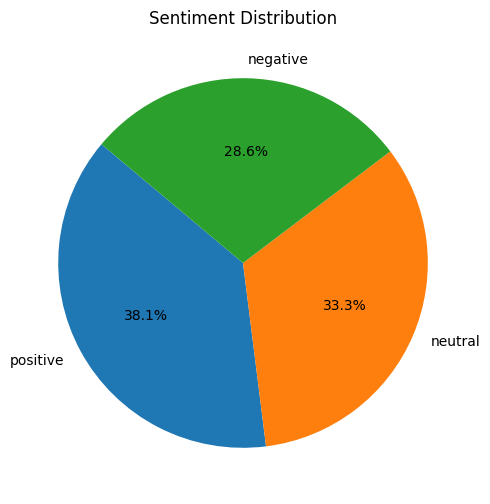

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df['predicted_sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()
